In [25]:
using DifferentialEquations
using Interact
using Plots
using Combinatorics
using StatsBase
gr()

Plots.GRBackend()

# Code 7.1 Adding +/- 1 the random matrix way using free sums

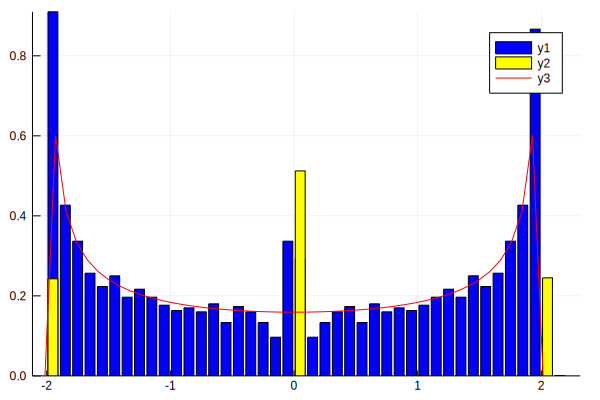

In [158]:
# Experiment : n by n diagonal matrices with random entries +1 or -1
# Plot : classical and free sum
# Theory : arcsine distribution

t = 30     # number of trials
n = 100  # size of matrix
v = zeros(n,t)
w = zeros(n,t)

for i=1:t
    a=sign.(randn(1,n))[:]
    b=sign.(randn(1,n))[:]
    Q = qrfact(randn(n,n))[:Q]
    v[:,i] = a+b
    w[:,i] = real.(eigvals(diagm(a) + Q'*diagm(b)*Q))
end

dx = .1

## Plot
w_hist = fit(Histogram,w[:],closed=:left,-2:dx:2.2)
bar(w_hist.edges,w_hist.weights/(n*dx*t),color="blue")
v_hist = fit(Histogram,v[:],closed=:left,-2:dx:2.2)
bar!(v_hist.edges,v_hist.weights/(n*t),color="yellow")

## Theory
x = linspace(-2.1,2.1)
plot!(x, real((1./pi)./sqrt.(complex(4- x.^2))) , color="red")


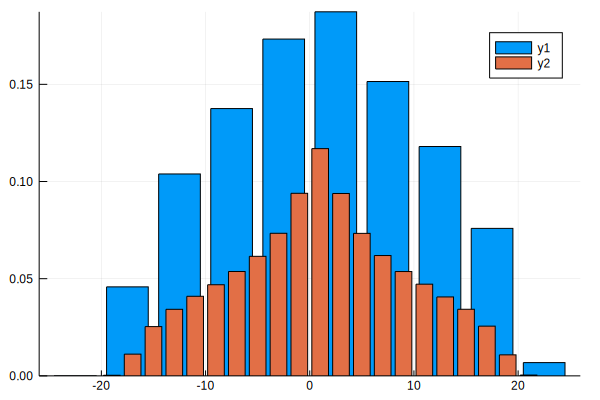

In [202]:
t = 1000     # number of trials
n = 140  # size of matrix
v = Float64[]
w = Float64[]

for i=1:t
    A = randn(n,n)
    symA = (A+A')/2
    corr = cov2cor(symA,diag(symA))
    v = append!(v,eigvals(corr))
    symB = (A+A')
    corrB = cov2cor(symB,diag(symB))
    w = append!(w,eigvals(corrB))
end

## Plot
v_hist = fit(Histogram,v,closed=:left)
bar(v_hist.edges,v_hist.weights/(t*n))


w_hist = fit(Histogram,w,closed=:left)
bar!(w_hist.edges,w_hist.weights/(t*n))

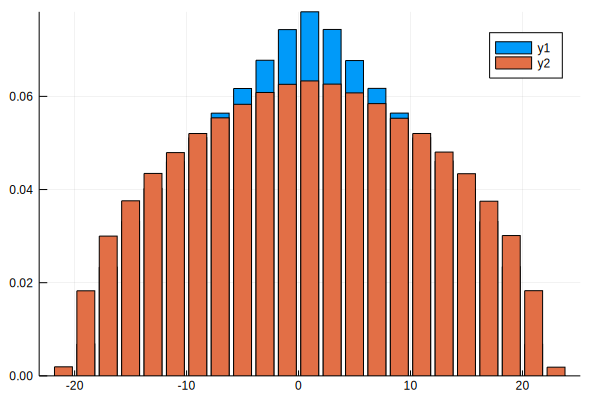

In [198]:

v_hist = fit(Histogram,v,closed=:left)
bar(v_hist.edges,v_hist.weights/(t*n))


w_hist = fit(Histogram,w,closed=:left)
bar!(w_hist.edges,w_hist.weights/(t*n))